<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow_addons as tfa
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE


[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [146]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [147]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [148]:
# Leitura do dataframe:
df = pd.read_csv('/total_10.csv')

In [149]:
df_total = df.copy()

In [150]:
df_total.set_index('id', inplace=True)

In [151]:
df_total.columns

Index(['cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8',
       'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01',
       'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08', 'ind09',
       'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17',
       'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25',
       'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33',
       'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40', 'ind41',
       'ind42', 'ind43', 'target', 'cnae_secao', 'ind_g1_mv', 'ind_g1',
       'ind_g2_mv', 'ind_g2', 'mc_g1_mv', 'mc_g1', 'md1_o', 'md2_o', 'md3_o',
       'md4_o', 'md5_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md12_o',
       'mc1_o', 'mc3_o', 'mc4_o'],
      dtype='object')

Retirando algumas colunas para testar

In [152]:
df_total.drop(columns = ['rf2','cnae2','md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8',
       'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4','mc_g1','ind_g1',
       'ind_g2','ind29', 'ind30','ind33', 'ind38', 'ind40', 'ind41','ind18'], inplace = True)

In [153]:
df_total.columns

Index(['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25',
       'ind26', 'ind27', 'ind28', 'ind31', 'ind32', 'ind34', 'ind35', 'ind36',
       'ind37', 'ind39', 'ind42', 'ind43', 'target', 'cnae_secao', 'ind_g1_mv',
       'ind_g2_mv', 'mc_g1_mv', 'md1_o', 'md2_o', 'md3_o', 'md4_o', 'md5_o',
       'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md12_o', 'mc1_o', 'mc3_o',
       'mc4_o'],
      dtype='object')

GET DUMMIES

In [154]:
#df_total['cnae2'] = df_total['cnae2'].astype('category')
#df_total[['ind28', 'ind31', 'ind32', 'ind34', 'ind35', 'ind36', 'ind37', 'ind39', 'ind42', 'ind43']] = df_total[['ind28', 'ind31', 'ind32', 'ind34', 'ind35', 'ind36', 'ind37', 'ind39', 'ind42', 'ind43']].astype('category')
#df_total[['ind28', 'ind43']] = df_total[['ind28', 'ind43']].astype('category')

In [155]:
df_total = pd.get_dummies(df_total)

In [156]:
X_treino = df_total[df_total['target']!= 2]

In [157]:
df_X = X_treino.copy()

In [158]:
df_y = df_X['target']
df_X = df_X.drop(columns= ['target'])

In [159]:
X_test = df_total[df_total['target']== 2].drop(columns= ['target'])

In [160]:
X_treino.columns

Index(['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25',
       'ind26', 'ind27', 'ind28', 'ind31', 'ind32', 'ind34', 'ind35', 'ind36',
       'ind37', 'ind39', 'ind42', 'ind43', 'target', 'ind_g1_mv', 'ind_g2_mv',
       'mc_g1_mv', 'md1_o', 'md2_o', 'md3_o', 'md4_o', 'md5_o', 'md7_o',
       'md8_o', 'md9_o', 'md10_o', 'md12_o', 'mc1_o', 'mc3_o', 'mc4_o',
       'cnae_secao_0', 'cnae_secao_A', 'cnae_secao_B', 'cnae_secao_C',
       'cnae_secao_D', 'cnae_secao_E', 'cnae_secao_F', 'cnae_secao_G',
       'cnae_secao_H', 'cnae_secao_I', 'cnae_secao_J', 'cnae_secao_K',
       'cnae_secao_L', 'cnae_secao_M', 'cnae_secao_N', 'cnae_secao_P',
       'cnae_secao_Q', 'cnae_secao_R', 'cnae_secao_S'],
      dtype='object')

Tratando o Balanceamento da Amostra

In [161]:
qtd = Counter(X_treino['target'])
qtd

Counter({0: 8513, 1: 2520})

In [162]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [163]:
over = SMOTE(sampling_strategy = 0.5) # Reamostrar a classe minoritária para ter 10% da classe majoritária
under = RandomUnderSampler(sampling_strategy = 0.85) # Seleciona a classe majoritária para ter 50%
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps = steps)

In [164]:
X, y = pipeline.fit_resample(df_X, df_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ANTES/DEPOIS:

In [165]:
print(Counter(df_y),Counter(y))

Counter({0: 8513, 1: 2520}) Counter({0: 5007, 1: 4256})


### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [166]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(X, y, test_size = 0.1, random_state = 22091980) #20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (8336, 71); X: Teste=  (927, 71)


In [167]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (8336,); Y: Teste = (927,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [252]:
# Número de Neurônios na Input Layer:
N_I = 71

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 400

N_H2 = 300

N_H3=200

N_H4 = 100

N_H5 = 50

N_H6 = 2



# Função de Ativação da Hidden Layer:
FA_H = tf.nn.leaky_relu
#FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid
#FA_O = tf.keras.activations.softmax




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [253]:
np.random.seed(19800922)
tf.random.set_seed(22091980)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

In [254]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H4, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H5, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H6, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 400)               28800     
_________________________________________________________________
dropout_54 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_55 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_56 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 100)              

### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [255]:

Algoritmo_Opt = tf.keras.optimizers.Adam()
#Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07 , amsgrad=True,     name='Adam')
#Loss_Function = tf.keras.losses.MeanSquaredError()
Loss_Function = tf.keras.losses.BinaryCrossentropy()
#Metrics_Perf = tf.keras.metrics.binary_accuracy
Metrics_Perf = tfa.metrics.F1Score(1,average='macro',threshold=0.5)
RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function,metrics = Metrics_Perf)
#RN.compile( loss = Loss_Function,metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [256]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_f1_score', mode = 'max',patience = 20, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 43, batch_size = 20,
             validation_data = (X_teste, y_teste), callbacks = callbacks)

Epoch 1/43
417/417 [==============================] - 3s 7ms/step - loss: 0.6432 - f1_score: 0.6137 - val_loss: 0.6096 - val_f1_score: 0.6747
Epoch 2/43
417/417 [==============================] - 3s 7ms/step - loss: 0.6205 - f1_score: 0.6387 - val_loss: 0.6059 - val_f1_score: 0.6768
Epoch 3/43
417/417 [==============================] - 3s 7ms/step - loss: 0.6133 - f1_score: 0.6356 - val_loss: 0.5982 - val_f1_score: 0.6820
Epoch 4/43
417/417 [==============================] - 3s 7ms/step - loss: 0.6061 - f1_score: 0.6532 - val_loss: 0.5950 - val_f1_score: 0.6797
Epoch 5/43
417/417 [==============================] - 3s 7ms/step - loss: 0.6054 - f1_score: 0.6444 - val_loss: 0.5990 - val_f1_score: 0.6721
Epoch 6/43
417/417 [==============================] - 3s 7ms/step - loss: 0.5965 - f1_score: 0.6496 - val_loss: 0.5906 - val_f1_score: 0.6931
Epoch 7/43
417/417 [==============================] - 3s 7ms/step - loss: 0.5944 - f1_score: 0.6575 - val_loss: 0.5920 - val_f1_score: 0.6652
Epoch 

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [257]:
def Mostra_ConfusionMatrix(X,y):
    y_pred = RN.predict_classes(X)
    mc = confusion_matrix(y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

In [258]:
RN.evaluate(X_teste, y_teste)

29/29 [==============================] - 0s 3ms/step - loss: 0.5672 - f1_score: 0.7157


[0.5672063827514648, 0.7157464623451233]

In [259]:
F1_Test=f1_score(y_teste, RN.predict_classes(X_teste), average="macro")
print(f'F1: {F1_Test}')

F1: 0.6991974115471888


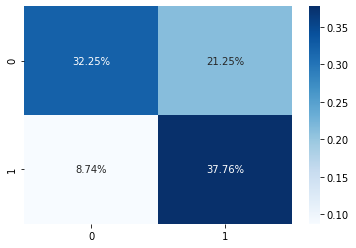

In [260]:
Mostra_ConfusionMatrix(X_teste, y_teste)

In [261]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 1s 3ms/step - loss: 0.5132 - f1_score: 0.5517


[0.5132027268409729, 0.551669716835022]

In [262]:
F1_X=f1_score(df_y, RN.predict_classes(df_X), average="macro")
print(f'F1: {F1_X}')

F1: 0.6579233872654224


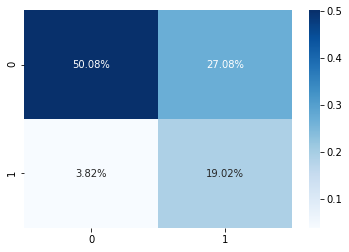

In [263]:
Mostra_ConfusionMatrix(df_X, df_y)

In [264]:
RN.evaluate(X_treinamento, y_treinamento)

261/261 [==============================] - 1s 2ms/step - loss: 0.4556 - f1_score: 0.7828


[0.455556720495224, 0.7827715277671814]

In [265]:
F1_Trein=f1_score(y_treinamento, RN.predict_classes(X_treinamento), average="macro")
print(f'F1: {F1_Trein}')

F1: 0.7772125394438054


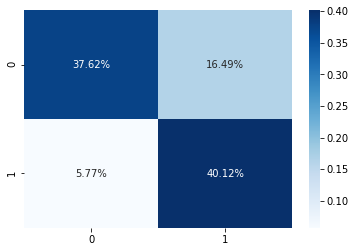

In [266]:
Mostra_ConfusionMatrix(X_treinamento, y_treinamento)

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [267]:
y_test = RN.predict_classes(X_test)


In [268]:
df_submit = pd.concat([pd.DataFrame(X_test.index,columns=['id']),pd.DataFrame(y_test,columns=['target']).astype('boolean')],axis=1)



In [269]:
df_submit

,id,target
0,3411,True
1,2177,True
2,8400,False
3,464,False
4,6672,True
...,...,...
995,8609,False
996,3384,True
997,8297,False
998,7556,False


In [270]:
df_submit['target'].value_counts()

False    504
True     496
Name: target, dtype: Int64

In [271]:
F = df_submit['target'].value_counts()[0]
T = df_submit['target'].value_counts()[1]

In [272]:
df_submit.to_csv(f'/PyLadies_NL_121_Test_{round(F1_Test,4)}_X_{round(F1_X,4)}_Trein_{round(F1_Trein,4)}_F{F}_T{T}.csv',index = False, sep = ',')

### Salvar a Rede Neural

In [273]:
# Save the weights
RN.save('/RN_121.h5')